# PROBLEM STATEMENT
Breast cancer remains a significant global health challenge, with early detection being paramount for improving patient outcomes. Leveraging machine learning algorithms, this project aims to develop a predictive model capable of accurately classifying breast tumors as either malignant (M) or benign (B) based on a comprehensive analysis of medical  data. By harnessing advanced data analytics techniques, the project endeavors to enhance the efficacy of early diagnosis, thus empowering healthcare professionals with a robust tool for timely intervention and personalized treatment strategies, ultimately contributing to reduced mortality rates and improved quality of life for breast cancer patients worldwide

# DATASET SELECTION AND PREPROCESSING

## Data Handling and Machine Learning Model Evaluation for Breast Cancer Prediction

Designed to handle and analyze a dataset specifically sourced from Kaggle, a platform known for its extensive repository of datasets and machine learning competitions. This dataset, identified as "breast_cancer_expanded_dataset.csv loaded from a CSV file into a pandas DataFrame, a critical step for subsequent data handling and processing. This initial glimpse of the dataset via df.head() allows for a quick assessment of data quality and structure, providing insights into the types of features available for analysis. The script's inclusion of various machine learning models from Scikit-learn—ranging from Neural networks,decision trees and support vector machines—prepares the ground for a detailed comparative study. These models will be evaluated to determine which best predicts breast cancer outcomes, leveraging the dataset's features. This setup not only facilitates a thorough exploration of the data but also optimizes it for advanced statistical analyses and predictive modeling, setting a robust foundation for impactful health informatics research.

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("breast_cancer_expanded_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,3.048642e+06,M,17.971931,10.422523,123.038998,1010.679004,0.118376,0.276847,0.301246,0.147314,...,25.500017,17.217229,184.775788,2023.940579,0.162339,0.666989,0.710214,0.265724,0.460163,0.119134
1,3.248717e+06,M,20.504629,17.854892,133.010474,1329.620513,0.084951,0.078766,0.085893,0.070364,...,25.012428,23.414819,158.779310,1950.232129,0.124237,0.187702,0.241233,0.186230,0.274851,0.089053
2,8.308423e+07,M,19.733084,21.226184,130.072458,1206.386366,0.109611,0.161120,0.198109,0.128497,...,23.565253,25.634042,152.280293,1702.704701,0.144531,0.427018,0.448880,0.243555,0.361381,0.087787
3,8.440706e+07,M,11.423847,20.427818,77.653815,384.723555,0.142544,0.283623,0.241326,0.105410,...,14.876205,26.476193,99.041551,564.829786,0.209767,0.863589,0.687396,0.257700,0.663555,0.172784
4,8.465858e+07,M,20.295838,14.297520,134.974219,1300.068231,0.100374,0.132542,0.196814,0.104399,...,22.438373,16.638056,152.383430,1577.492830,0.137631,0.206669,0.401075,0.162672,0.236337,0.076846


## Identifying Missing Values in a DataFrame Using df.isnull().sum()

The code snippet df.isnull().sum() is a commonly used method in pandas, a Python data manipulation library, to identify missing values within a DataFrame (df). This method is particularly useful in the data cleaning and preprocessing phases of data analysis.

In [2]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Data Exploration and Preprocessing with Pandas

This Python script uses the pandas library to load and analyze a dataset from a CSV file named 'breast_cancer_expanded_dataset.csv'. It begins by reading the dataset into a DataFrame and then proceeds to display the first few rows to provide a snapshot of the data's structure and initial entries. The script outputs basic metadata about the dataset, including the number of entries, the datatype of each column, and the presence of null values, using df.info(). It then generates summary statistics for numerical columns with df.describe(), offering insights into central tendency, dispersion, and shape of the dataset’s distribution. Finally, it checks and reports the number of missing values in each column using df.isnull().sum(), helping identify data quality issues that might need addressing in preprocessing steps. This sequence of operations is crucial for initial data assessment, guiding further cleaning, analysis, and modeling activities.

In [3]:
import pandas as pd
# Step 1: Selecting a dataset
df = pd.read_csv('breast_cancer_expanded_dataset.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First few rows of the dataset:
             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0  3.048642e+06         M    17.971931     10.422523      123.038998   
1  3.248717e+06         M    20.504629     17.854892      133.010474   
2  8.308423e+07         M    19.733084     21.226184      130.072458   
3  8.440706e+07         M    11.423847     20.427818       77.653815   
4  8.465858e+07         M    20.295838     14.297520      134.974219   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0  1010.679004         0.118376          0.276847        0.301246   
1  1329.620513         0.084951          0.078766        0.085893   
2  1206.386366         0.109611          0.161120        0.198109   
3   384.723555         0.142544          0.283623        0.241326   
4  1300.068231         0.100374          0.132542        0.196814   

   concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0             0.147314  ...     25.500017   

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.989844e+07,14.135533,19.261524,92.026807,655.583620,0.096377,0.104419,0.089036,0.049047,0.181302,...,16.285191,25.648936,107.364586,882.095111,0.132389,0.254670,0.272709,0.114834,0.290495,0.083959
std,1.232414e+08,3.518936,4.278956,24.266795,351.286487,0.014023,0.052902,0.079787,0.038808,0.027461,...,4.831246,6.132811,33.566240,568.549258,0.022837,0.157807,0.208886,0.065792,0.062075,0.018086
min,-4.121749e+06,6.927863,9.626705,43.569989,139.607998,0.052476,0.018415,-0.002386,-0.000848,0.105473,...,7.864242,11.984863,50.063108,178.654953,0.070779,0.024959,-0.006670,-0.001301,0.155650,0.054791
25%,3.822221e+05,11.693910,16.160488,75.130449,419.537486,0.086344,0.064839,0.029247,0.020338,0.161981,...,13.008701,21.065950,84.137958,514.527050,0.116578,0.146428,0.114010,0.064416,0.250614,0.071371
50%,1.546392e+06,13.362077,18.822353,86.258332,550.326850,0.095930,0.092950,0.061493,0.033679,0.179427,...,14.954424,25.369004,97.798772,685.147018,0.131370,0.213824,0.227951,0.100302,0.282350,0.079984
75%,8.480591e+06,15.830531,21.754581,104.322449,788.919500,0.105262,0.130526,0.131597,0.074101,0.195724,...,18.874108,29.673555,125.961081,1090.604440,0.146111,0.339797,0.384436,0.162539,0.318474,0.092066
max,9.150227e+08,28.138334,39.343381,189.027651,2505.483736,0.163653,0.345700,0.428172,0.201719,0.304494,...,36.116542,49.563874,251.791418,4260.299732,0.223145,1.059926,1.255012,0.291860,0.664396,0.207723


## Feature Normalization Using StandardScaler

The Below code snippet, features and the target variable are defined from a DataFrame df, where X contains all columns except 'diagnosis', which is used as the target variable y. The features in X are then normalized using StandardScaler, a preprocessing tool from Scikit-learn that standardizes the data by removing the mean and scaling to unit variance. This normalization process is essential for many machine learning algorithms as it ensures that all features contribute equally to the analysis, preventing biases associated with scale differences. The transformed data, stored in X_scaled, is now ready for use in machine learning models, which can perform more effectively with scaled input data.

In [5]:
# Define features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.21788517,  1.09032416, -2.06589728, ...,  2.29365626,
         2.73357064,  1.94507838],
       [-0.21626157,  1.81013029, -0.32876528, ...,  1.08527968,
        -0.25204188,  0.28169359],
       [ 0.43160086,  1.59085314,  0.45919067, ...,  1.95667569,
         1.14206513,  0.21164974],
       ...,
       [-0.15964576, -0.59215304,  1.32032701, ...,  0.0853743 ,
        -0.50309821, -0.07264692],
       [-0.18241475,  1.03305298,  2.05527866, ...,  1.24026865,
         0.11126857,  0.36769246],
       [-0.1656325 ,  0.20014292, -0.34792339, ..., -0.47784217,
         1.11704771, -0.60219062]])

## Splitting the Dataset into Training and Testing Sets Using 'train_test_split'

'train_test_split' function from 'Scikit-learn' to divide the preprocessed dataset into training and testing subsets. Specifically, it partitions the normalized features (X_scaled) and the corresponding target variable (y) into training (70%) and testing (30%) sets, as specified by the test_size=0.3 parameter. The random_state=42 ensures that the split is reproducible, meaning the same random split will occur each time the code is run, which is useful for debugging and comparing model performance. The shapes of these datasets are printed, confirming the distribution of data across the training and testing sets. This step is crucial for training machine learning models as it provides a separate test set to evaluate model performance, ensuring that the evaluation is based on data that was not used during the model training process

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3500, 31)
Shape of X_test: (1500, 31)
Shape of y_train: (3500,)
Shape of y_test: (1500,)


# EXPLORATORY DATA ANALYSIS(EDA) AND FEATURE SELECTION

## Analyzing Diagnostic Categories and Feature Correlations to Optimize Model Training




This code segment visualizes the distribution of the 'diagnosis' category within a dataset using a bar chart, which helps identify class imbalances that could influence model training. It also provides descriptive statistics for numeric fields, offering insights into data variance and central tendencies. Additionally, a correlation matrix heatmap is generated to reveal relationships and potential collinearities among features. These visualizations and statistics are crucial for effective data preprocessing and feature selection, ultimately enhancing the robustness and accuracy of predictive models.

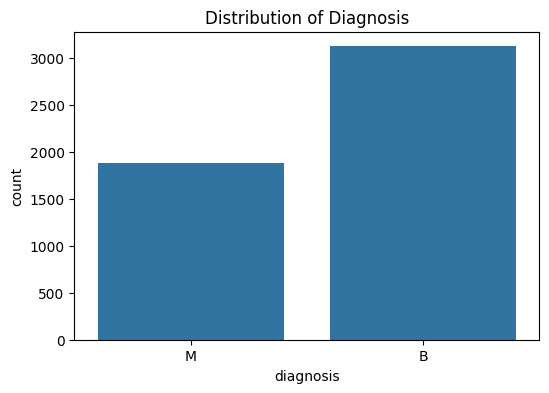

Descriptive Statistics:
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.000000e+03  5000.000000   5000.000000     5000.000000  5000.000000   
mean   2.989844e+07    14.135533     19.261524       92.026807   655.583620   
std    1.232414e+08     3.518936      4.278956       24.266795   351.286487   
min   -4.121749e+06     6.927863      9.626705       43.569989   139.607998   
25%    3.822221e+05    11.693910     16.160488       75.130449   419.537486   
50%    1.546392e+06    13.362077     18.822353       86.258332   550.326850   
75%    8.480591e+06    15.830531     21.754581      104.322449   788.919500   
max    9.150227e+08    28.138334     39.343381      189.027651  2505.483736   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count      5000.000000       5000.000000     5000.000000          5000.000000   
mean          0.096377          0.104419        0.089036             0.049047   
std           0.0140

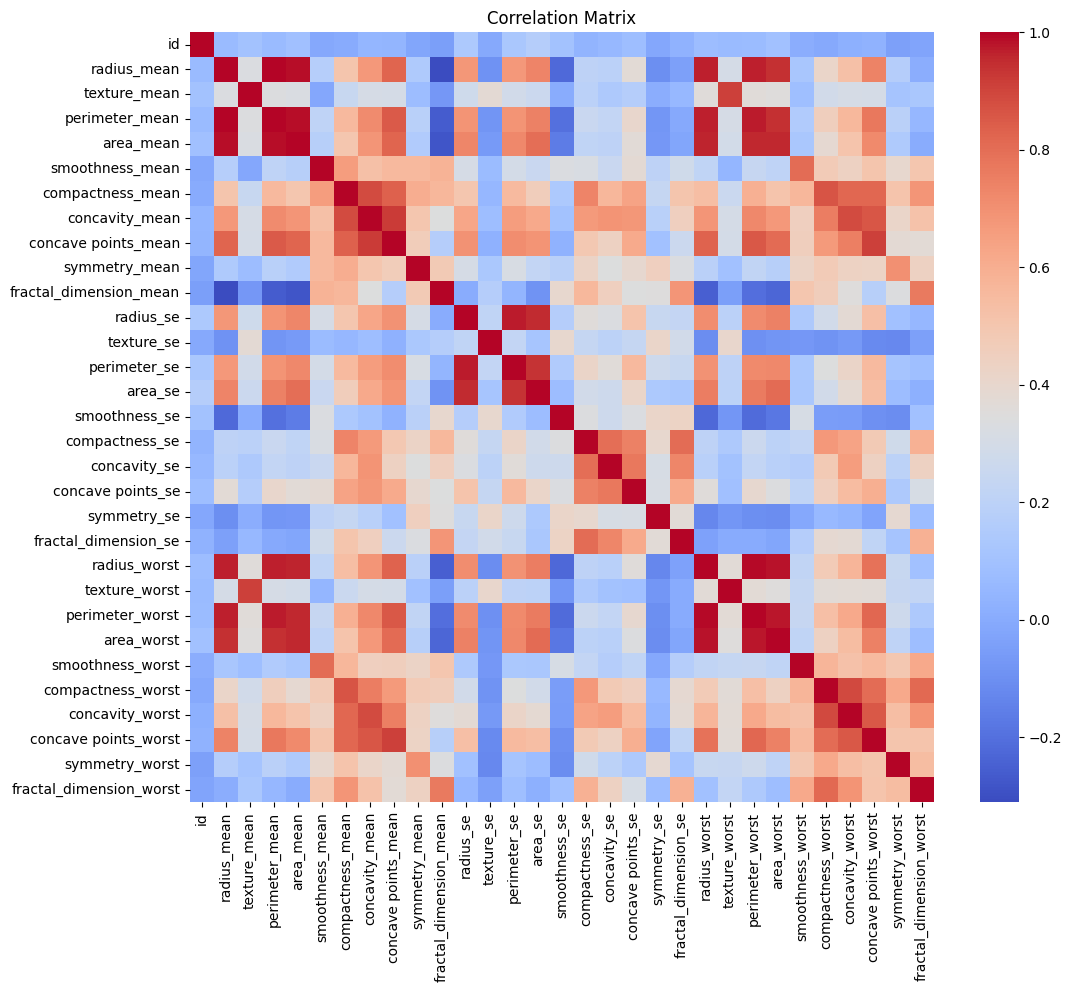

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

# Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include='number')  # Selecting numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
df.drop(columns='id',inplace=True)

## Visualizing Class Distribution with a Pie Chart in Data Analysis

The provided code generates a pie chart to display the distribution of categories within the diagnosis column of the DataFrame df. By using the value_counts() method and the pie chart visualization, it illustrates the relative frequencies of each diagnosis category in percentages. This visual format is effective for quickly assessing class balance or imbalance, which is crucial for planning data preprocessing and modeling strategies in analytical projects.

<Axes: ylabel='count'>

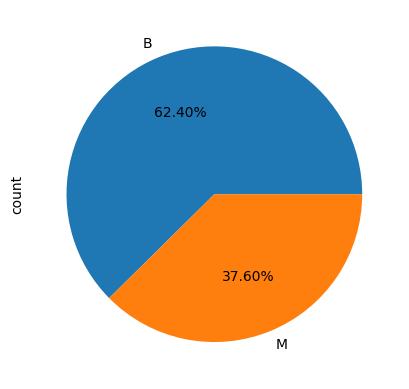

In [9]:
df['diagnosis'].value_counts().plot(kind='pie',autopct='%.2f%%')

## Detailed Exploratory Data Analysis with Bar Plots Across Multiple Subplots

The below code snippet above sets up a comprehensive visualization framework using Matplotlib and Seaborn to create bar plots for a large dataset. It organizes the plots into a grid of 30 subplots (10 rows by 3 columns) within a figure tailored to a large size for clear visibility. The axes array is flattened to facilitate easy indexing during iterative plotting. Each plot in the loop displays the distribution of values across different 'diagnosis' categories for each feature in the DataFrame, excluding the first column. This approach is invaluable for exploratory data analysis, allowing a detailed comparison of how various features distribute across categorical diagnoses. By visualizing these distributions side by side, it aids in the quick identification of trends, differences, and anomalies across multiple variables, providing insights that are critical for further data analysis, feature engineering, and model development processes.

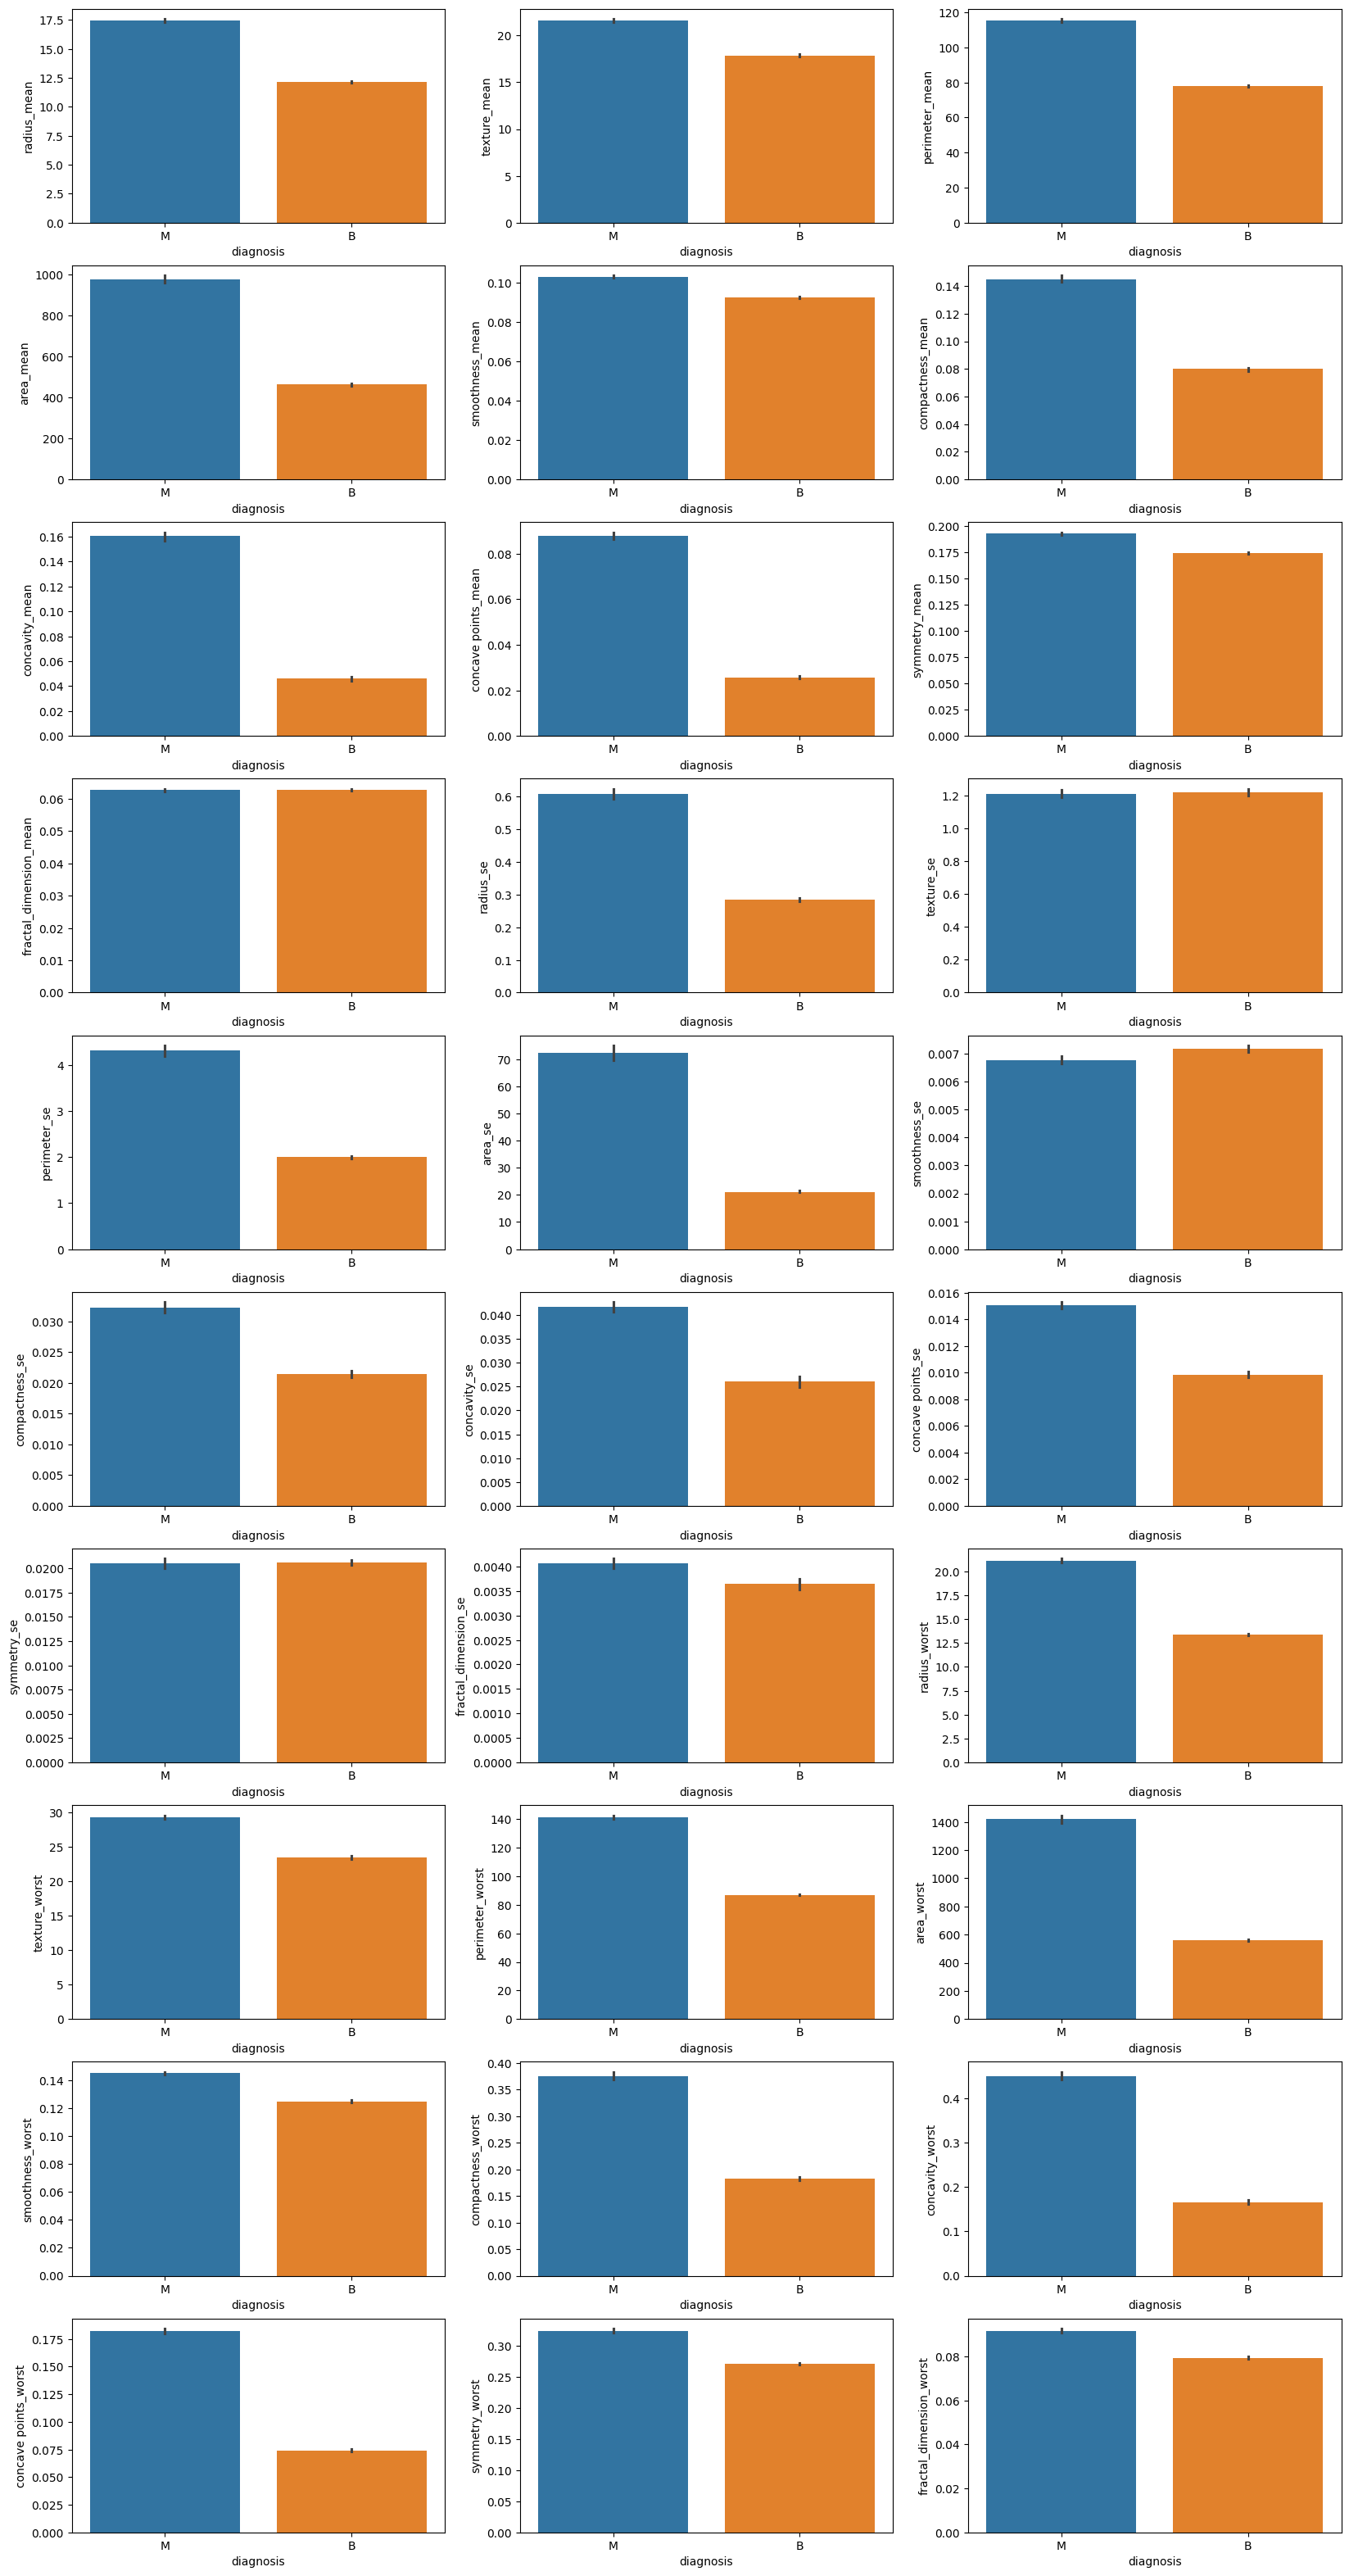

In [10]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.barplot(x='diagnosis',y=col,data=df,ax=ax[i],hue='diagnosis');

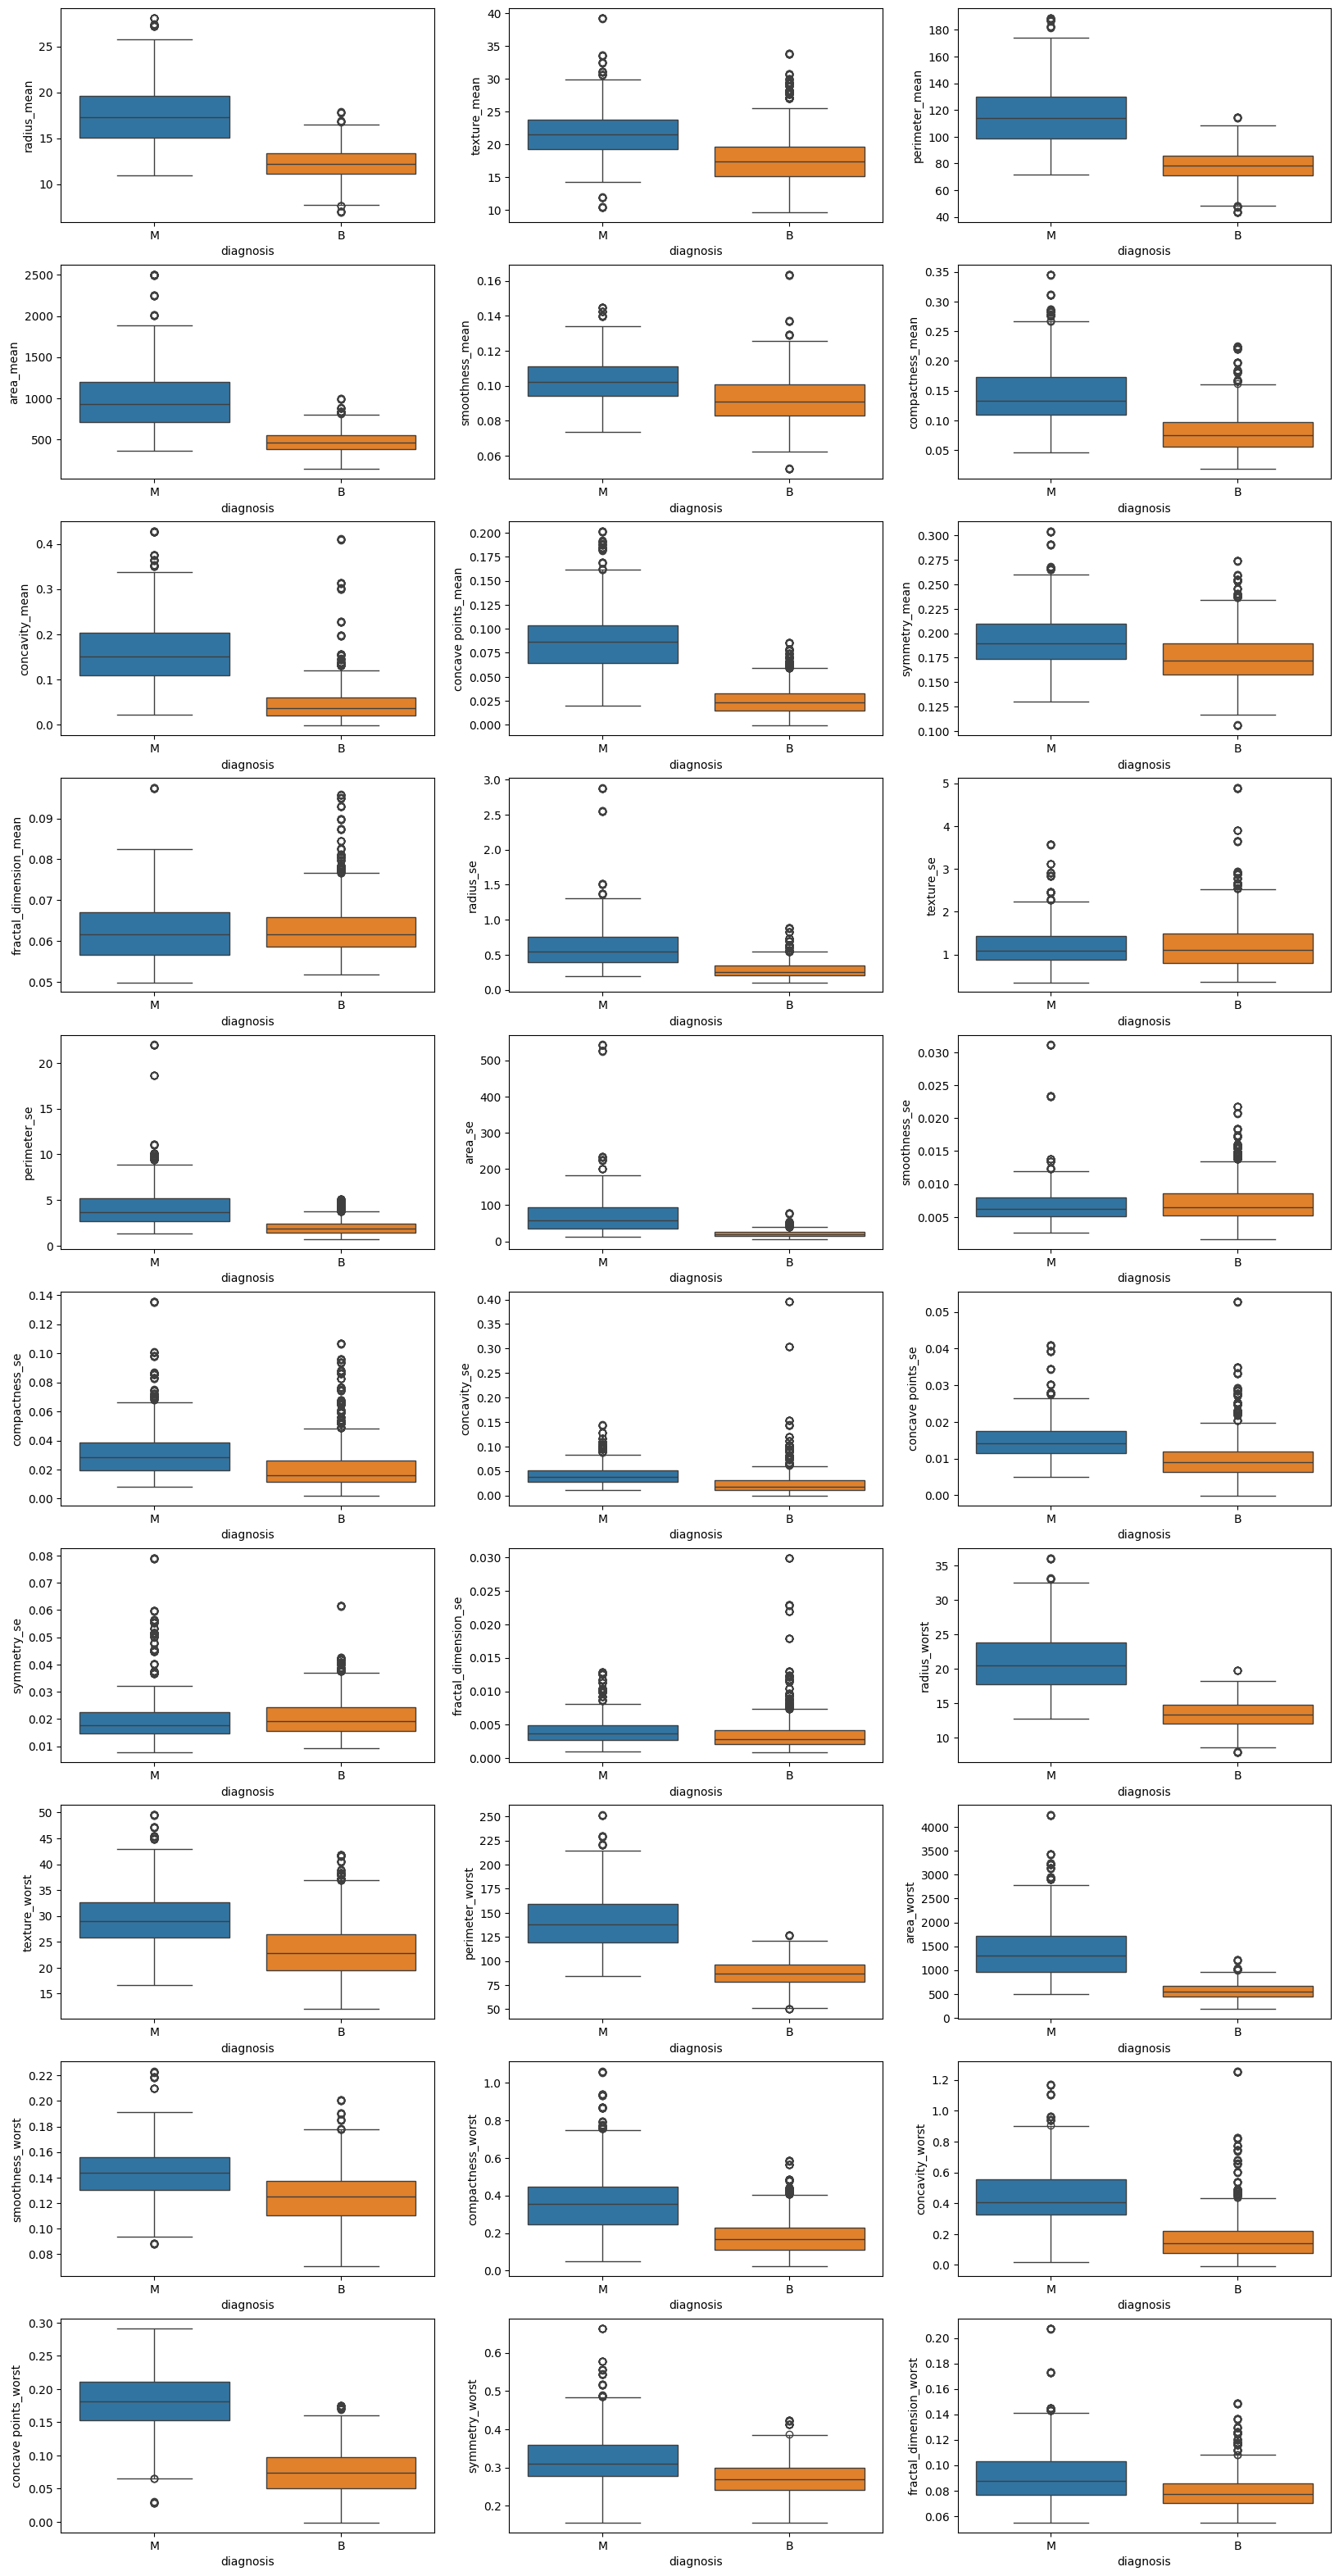

In [11]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.boxplot(x='diagnosis',y=col,data=df,ax=ax[i], hue='diagnosis');

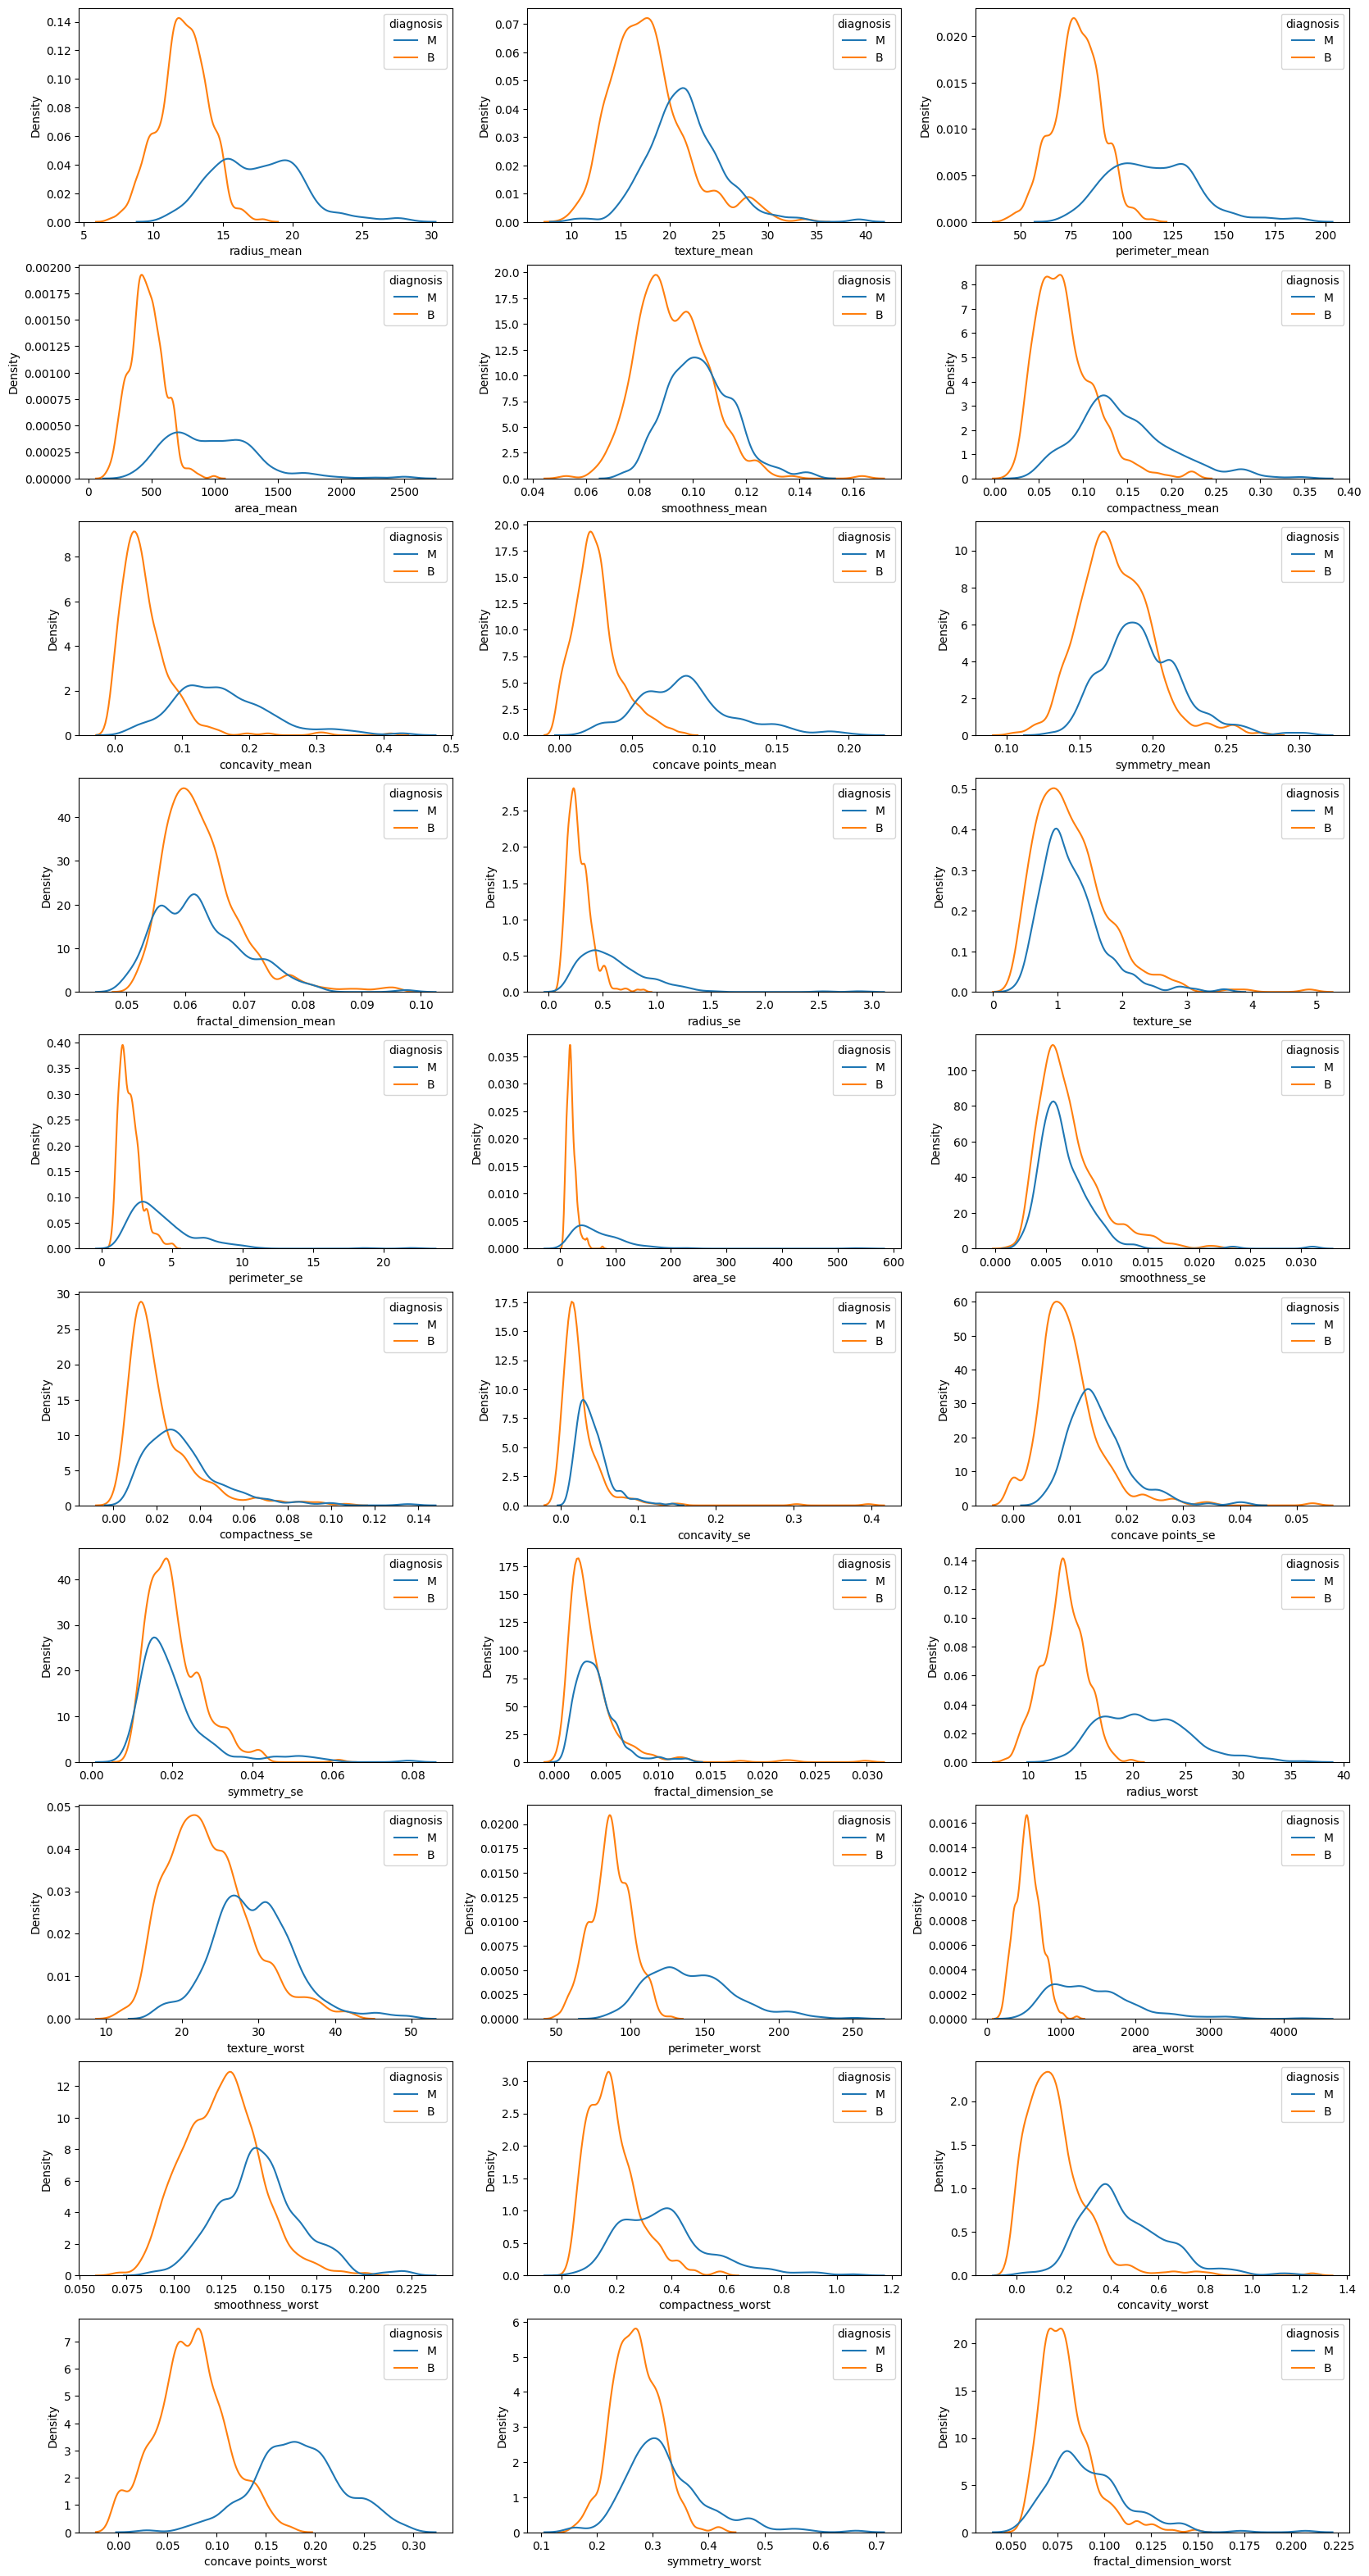

In [12]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.kdeplot(x=col,data=df,ax=ax[i],hue='diagnosis');

## Relevant features for modeling

The provided code snippet uses the SelectKBest class from Scikit-learn's feature selection module along with the f_classif scoring function to identify the top 10 features in a dataset based on their statistical significance with respect to the target variable y. The SelectKBest method works by selecting features according to the highest scores from a univariate statistical test, specifically ANOVA F-value in this case (f_classif). Initially, the method is fitted to the features X and target y, calculating scores for each feature. These scores are then placed into a DataFrame dfscores, with corresponding feature names in dfcolumns. The two DataFrames are concatenated for better visualization, with columns named 'Feature' and 'Score'. Finally, the script prints the top 10 features with the highest scores, effectively highlighting the most relevant variables for predicting the target. This approach is particularly valuable for reducing dimensionality and improving model performance by focusing on the most informative attributes.

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features


                 Feature        Score
28  concave points_worst  8540.218727
23       perimeter_worst  7914.084643
21          radius_worst  7583.737425
8    concave points_mean  7565.344127
3         perimeter_mean  6125.966416
24            area_worst  5830.067597
1            radius_mean  5686.059680
4              area_mean  5031.640067
7         concavity_mean  4661.311433
27       concavity_worst  3849.139920


# MODEL IMPLEMENTATION AND BASELINE EVALUATION

## Implementation and Performance Evaluation of an MLP Classifier with Scikit-learn

The provided script demonstrates setting up, training, and evaluating a Multi-Layer Perceptron (MLP) classifier using Scikit-learn's MLPClassifier. This classifier is configured with 1000 maximum iterations and the 'adam' solver, optimal for handling large datasets through stochastic gradient descent. After training on the training data (X_train, y_train), the model's predictive performance is assessed on the test set (X_test), and its accuracy is calculated relative to the actual outcomes (y_test). To visualize the results more clearly, a confusion matrix is created and displayed as a heatmap, offering insights into the model's precision and accuracy across different predicted categories by showing the counts of true and false positives and negatives. This detailed output helps pinpoint areas where the model might need adjustments or further refinement.

Neural Network Accuracy: 1.0


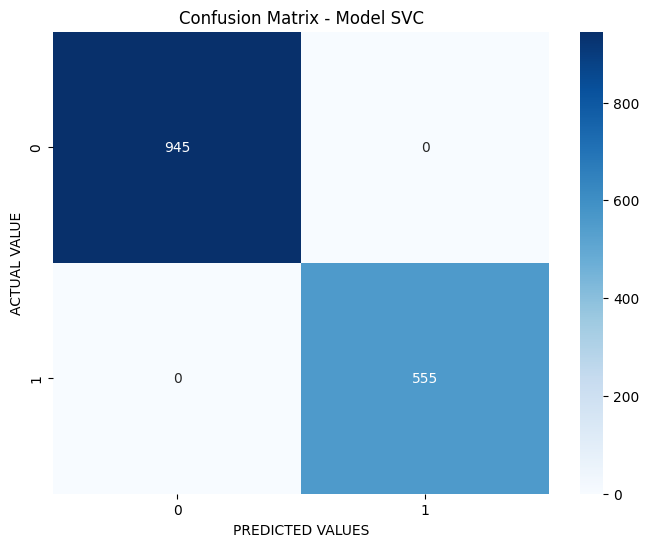

In [14]:
from sklearn.neural_network import MLPClassifier

# Creating MLP classifier with adjusted parameters
mlp_classifier = MLPClassifier(max_iter=1000, solver='adam')  # Adjust max_iter and solver as needed

# Training the classifier
mlp_classifier.fit(X_train, y_train)

# Predicting on test set
mlp_predictions = mlp_classifier.predict(X_test)

# Evaluating accuracy
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("Neural Network Accuracy:", mlp_accuracy)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()

## Modeling and Evaluating a Decision Tree Classifier: Accuracy and Confusion Matrix Analysis

This code outlines the process of using a Decision Tree Classifier to model and predict outcomes from a dataset. It begins by initializing a DecisionTreeClassifier with default settings, though parameters such as max_depth can be adjusted to fine-tune the model's complexity and potentially improve its accuracy. After training the model on a predefined training dataset (X_train, y_train), it makes predictions on a corresponding test set (X_test). The effectiveness of the model is quantified by calculating the accuracy score, comparing the predicted results (dt_predictions) against the actual outcomes (y_test). The accuracy metric provides a straightforward indication of the model's overall performance.
Additionally, the code generates a confusion matrix for the predictions, which is then visualized as a heatmap. This matrix helps to visually assess the model's performance in more detail, showing how well the classifier is identifying each class. It highlights true positives, true negatives, false positives, and false negatives, providing insights into any potential biases or weaknesses in the model. 

Decision Tree Accuracy: 0.9973333333333333


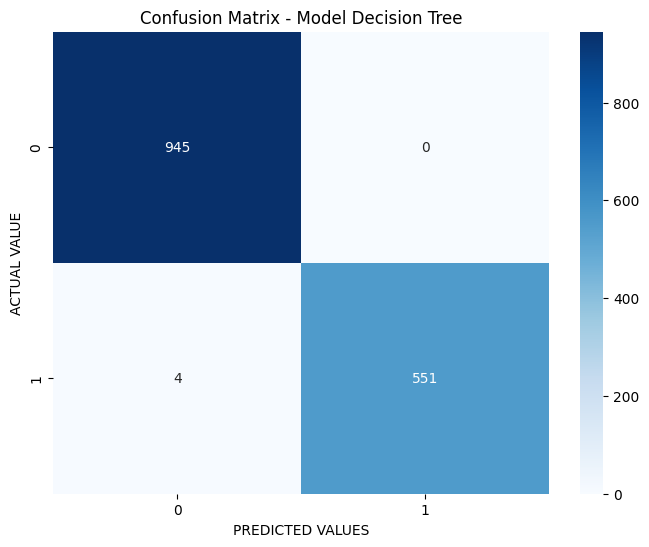

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Creating Decision Tree classifier with default parameters
dt_classifier = DecisionTreeClassifier()  # Default settings; you can adjust parameters like max_depth

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Predicting on test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluating accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Generating confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()


## Implementing and Evaluating an SVM Classifier with Scikit-learn

This code snippet demonstrates the setup, training, evaluation, and visualization of a Support Vector Machine (SVM) classifier using Scikit-learn. The SVM is initiated with a linear kernel, a choice that can be adjusted based on the specific characteristics and complexity of the data being modeled. The classifier is then trained on a predefined training dataset (X_train and y_train) and subsequently used to make predictions on a test dataset (X_test).
The effectiveness of the classifier is quantified through the accuracy_score function, which compares the predicted outcomes (svm_predictions) with the actual labels (y_test) to determine the proportion of correct predictions. The resulting accuracy is then printed, providing a straightforward metric of the model’s performance.

SVM Accuracy: 0.99


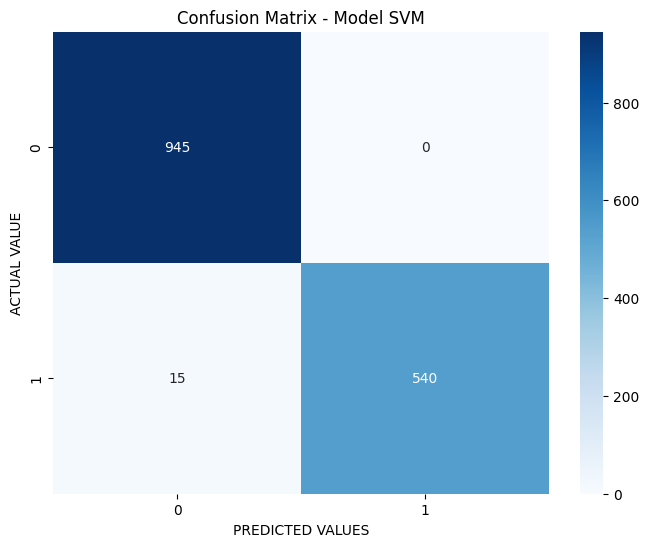

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Creating SVM classifier with default parameters
svm_classifier = SVC(kernel='linear')  # Using a linear kernel; adjust as needed

# Training the classifier
svm_classifier.fit(X_train, y_train)

# Predicting on test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluating accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Generating confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVM")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()


# HYPERPARAMETER TUNING

## Neural Network Hyperparameter
This code utilizes Scikit-learn's MLPClassifier within a GridSearchCV framework to optimize and evaluate a Multi-Layer Perceptron (MLP) neural network for a classification task. It specifies a grid of hyperparameters, including various configurations for hidden layers, activation functions, optimization solvers, and regularization strengths. These are systematically tested to determine the most effective settings. The best-performing model is then used to predict on a test dataset, and its accuracy is assessed. Results from the grid search are detailed through printed outputs and visualized via a heatmap, which shows the performance of different parameter combinations. This approach ensures a thorough exploration of potential model configurations, aiming to enhance prediction accuracy and provide clear insights into the neural network's performance across varied conditions.





In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your data loaded into X_train and y_train

# Neural Network hyperparameters
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]  # Regularization term
}

# Creating the GridSearchCV object
grid_search_nn = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_nn, refit=True, verbose=2, cv=3)

# Fit the grid search to your data
grid_search_nn.fit(X_train, y_train)

# Get the best neural network model
best_nn_model = grid_search_nn.best_estimator_

# Use the best model to predict on your test set
y_pred = best_nn_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Displaying the best parameters and the score achieved with them
print("Best Neural Network Parameters:", grid_search_nn.best_params_)
print("Best Neural Network Score:", grid_search_nn.best_score_)
print("Test Set Accuracy:", test_accuracy)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   4.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   5.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   5.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), solver=sgd; total time=   5.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=

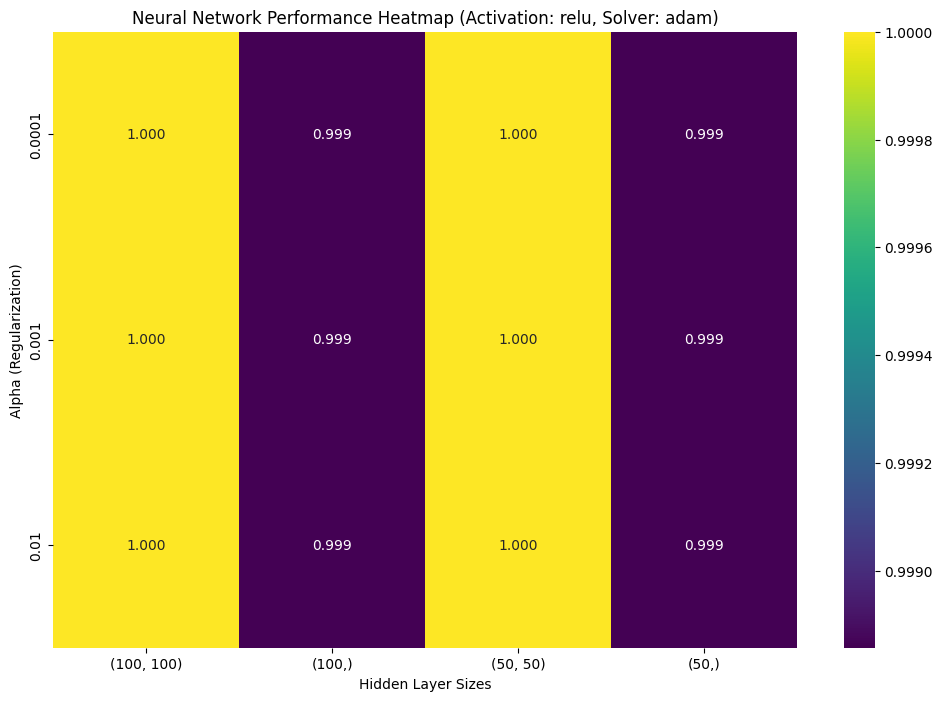

In [18]:
# Extracting results from the GridSearchCV object
results = pd.DataFrame(grid_search_nn.cv_results_)
params = results[['param_hidden_layer_sizes', 'param_alpha', 'mean_test_score']]
params['param_alpha'] = params['param_alpha'].astype(float)
params['mean_test_score'] = params['mean_test_score'].astype(float)

# Converting tuple representation for easier plotting
params['param_hidden_layer_sizes'] = params['param_hidden_layer_sizes'].apply(lambda x: str(x))

# Creating a pivot table for a chosen activation and solver, example: 'relu' and 'adam'
chosen_activation = 'relu'
chosen_solver = 'adam'
filtered_params = params[(results['param_activation'] == chosen_activation) & (results['param_solver'] == chosen_solver)]
pivot = filtered_params.pivot_table(index='param_alpha', columns='param_hidden_layer_sizes', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis', cbar=True)
plt.title(f'Neural Network Performance Heatmap (Activation: {chosen_activation}, Solver: {chosen_solver})')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Alpha (Regularization)')
plt.show()


## Decision Tree Classifier
This script efficiently employs Scikit-learn's GridSearchCV to fine-tune a Decision Tree classifier, utilizing a comprehensive set of hyperparameters. The hyperparameters tested include various levels of max_depth, min_samples_split, and min_samples_leaf. These settings are crucial as they control the tree depth, the minimum number of samples required to split a node, and the minimum number of samples a leaf node must have, respectively, thus directly impacting the model's complexity and its ability to generalize.
The GridSearchCV process iteratively explores different combinations of these parameters across multiple cross-validation folds to identify the configuration that maximizes the cross-validated score. Once the grid search completes, the best parameters and the corresponding score are displayed, providing clear insights into the decision tree's performance with the optimal settings.
Further, the script generates and plots heatmaps for each unique value of min_samples_leaf found in the results. These heatmaps visualize the relationship between max_depth and min_samples_split in terms of their impact on the model's mean test score, color-coded for clarity. This visualization is not only useful for assessing which combinations of depth and split criteria yield the best performance but also for understanding how sensitivity to the dataset's granularity affects the decision tree's accuracy. This methodical approach to model tuning and visualization helps in making informed decisions about model selection and refinement.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Decision Tree hyperparameters
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Creating the GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=2, cv=3)
grid_search_dt.fit(X_train, y_train)

# Displaying the best parameters and the score achieved with them
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Score:", grid_search_dt.best_score_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.

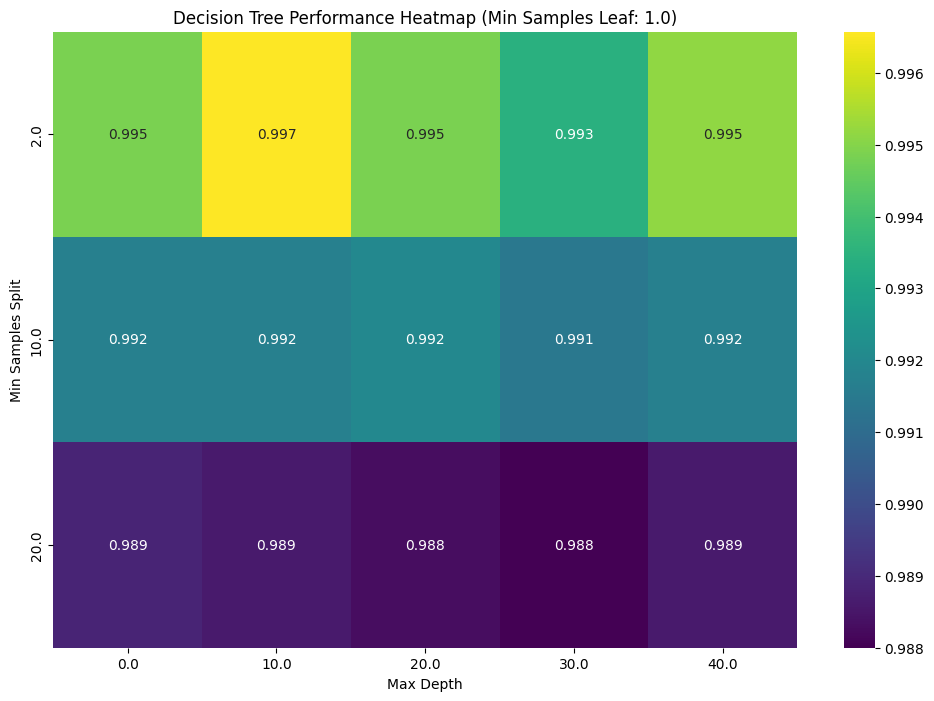

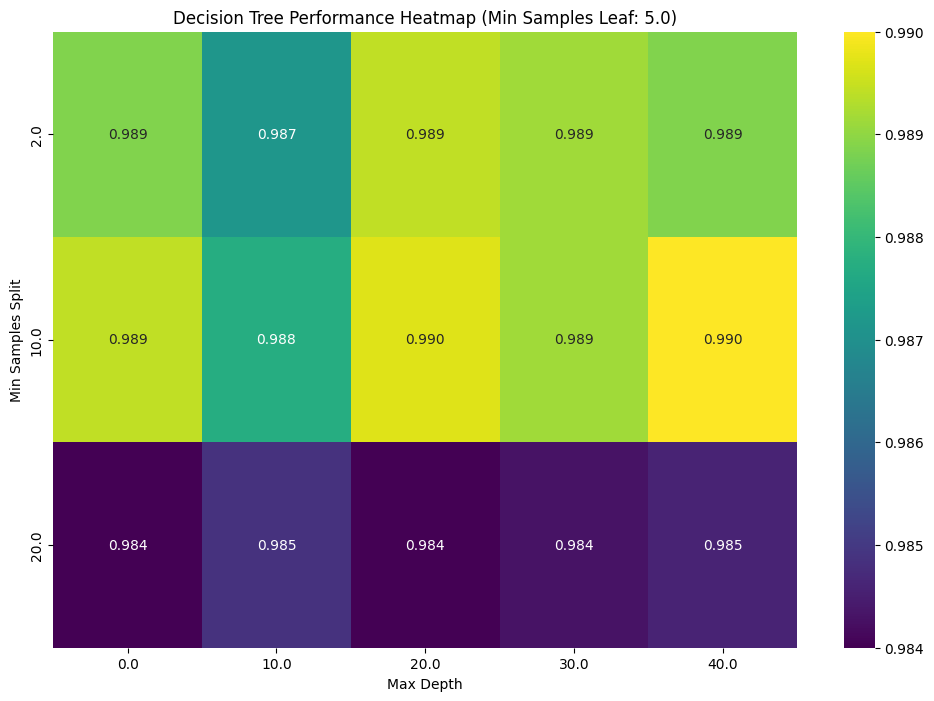

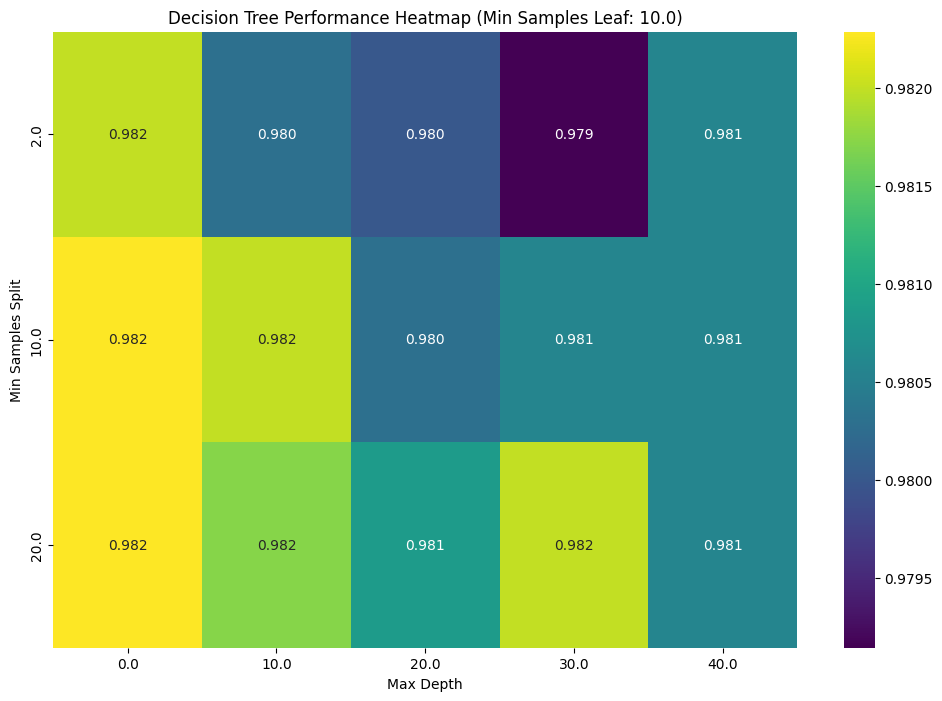

In [20]:
# Extracting results from the GridSearchCV object
results = pd.DataFrame(grid_search_dt.cv_results_)
params = results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]
params['param_max_depth'] = params['param_max_depth'].astype(float).fillna(0)  # Convert 'None' to a numeric value if needed
params['param_min_samples_split'] = params['param_min_samples_split'].astype(float)
params['param_min_samples_leaf'] = params['param_min_samples_leaf'].astype(float)
params['mean_test_score'] = params['mean_test_score'].astype(float)

# Plotting the heatmaps for each 'min_samples_leaf'
min_samples_leaves = params['param_min_samples_leaf'].unique()
for leaf in min_samples_leaves:
    pivot = params[params['param_min_samples_leaf'] == leaf].pivot_table(
        index='param_min_samples_split', 
        columns='param_max_depth', 
        values='mean_test_score'
    )
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis', cbar=True)
    plt.title(f'Decision Tree Performance Heatmap (Min Samples Leaf: {leaf})')
    plt.xlabel('Max Depth')
    plt.ylabel('Min Samples Split')
    plt.show()

## Support Vector Machine Hyperparameter
This script employs Scikit-learn's GridSearchCV to optimize a Support Vector Machine (SVM) classifier, exploring a well-defined grid of hyperparameters to find the best configuration for model training. The hyperparameters tuned include the regularization parameter (C), the kernel coefficient (gamma), and the type of kernel used (kernel). These parameters critically influence the SVM's ability to model complex boundaries and manage the trade-off between bias and variance.

Upon defining the grid, the script initializes a GridSearchCV object with the SVC classifier, setting it to refit the best model, be verbose during operation, and use 3-fold cross-validation. The grid search is then executed to fit the SVM model to the training data (X_train, y_train), which rigorously evaluates each combination of parameters to ascertain the most effective SVM settings.

Results of the grid search, including the best parameters and their corresponding score, are displayed to provide immediate feedback on the performance of the optimal model. Detailed results from the grid search are extracted into a DataFrame for further analysis. This DataFrame is manipulated to plot heatmaps for each kernel type, allowing visualization of performance across the combinations of C and gamma. Each heatmap illustrates how these parameters influence the model's average score, making it easier to visually assess which settings yield the highest predictive accuracy.
The heatmaps are particularly valuable for understanding the interaction between the regularization strength (C) and the scale of the kernel function (gamma), which directly affects how the SVM classifier handles data complexity and feature space transformation. Such visual insights are instrumental in fine-tuning the SVM to enhance its generalization on new, unseen data. This comprehensive approach ensures a thorough exploration of parameter space, leading to an informed selection of the best SVM configuration for the task at hand.

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SVM hyperparameters
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Creating the GridSearchCV object
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, cv=3)
grid_search_svm.fit(X_train, y_train)

# Displaying the best parameters and the score achieved with them
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Score:", grid_search_svm.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

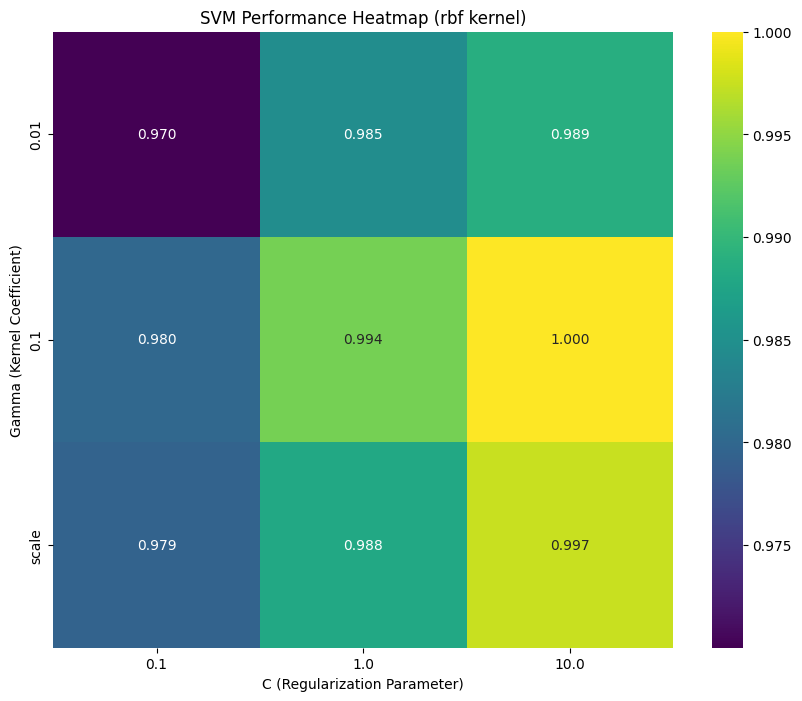

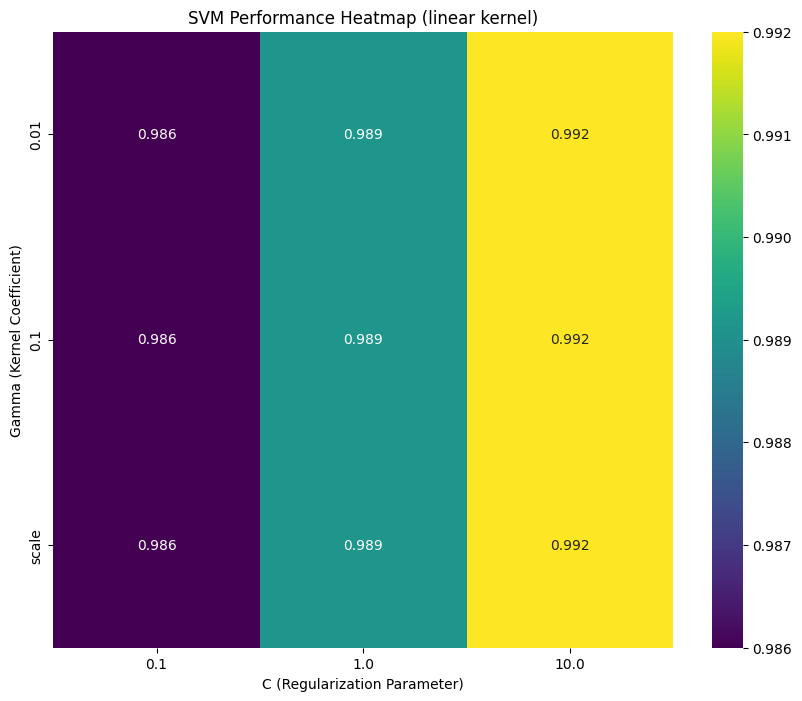

In [22]:
# Extracting results from the GridSearchCV object
results = pd.DataFrame(grid_search_svm.cv_results_)
params = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
params['param_C'] = params['param_C'].astype(float)
params['param_gamma'] = params['param_gamma'].astype(str)
params['mean_test_score'] = params['mean_test_score'].astype(float)

# Create pivot tables for each kernel type and plot them
for kernel in params['param_kernel'].unique():
    pivot = params[params['param_kernel'] == kernel].pivot_table(
        index='param_gamma', 
        columns='param_C', 
        values='mean_test_score'
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis')
    plt.title(f'SVM Performance Heatmap ({kernel} kernel)')
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Gamma (Kernel Coefficient)')
    plt.show()

# MODEL EVALUATION AND COMPARATIVE ANALYSIS

This script evaluates three different machine learning models—SVM, Decision Tree, and Neural Network—on a classification task using various metrics. Initially, it transforms the target labels using LabelEncoder to fit the numeric input requirement of these models. Each model is then trained on the training dataset and used to make predictions on the test dataset. Notably, for models capable of producing probability estimates (SVM and Neural Network), the probabilities of the positive class are calculated. These probabilities are used to derive the ROC curve and compute the AUC score, which measures the model's ability to discriminate between classes. The accuracy and a detailed classification report are also generated for each model, providing insights into their performance. This multi-metric evaluation helps in understanding each model's strengths and weaknesses, with ROC curves plotted for a visual comparison of their predictive capabilities. Finally, all key performance indicators are displayed, offering a comprehensive assessment of how each model performs on the given data.

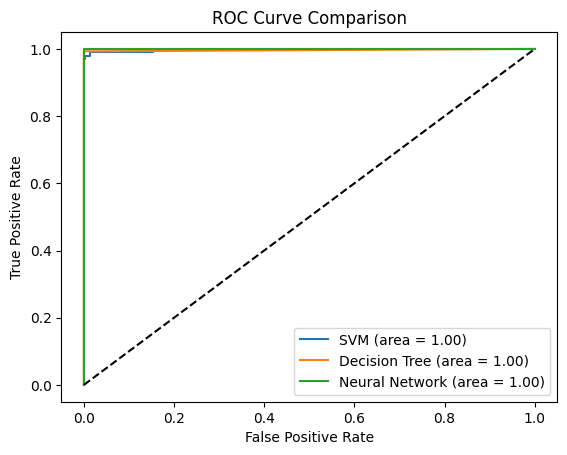


SVM Model Metrics:
Accuracy: 0.9886666666666667
ROC AUC: 0.9983545450212116
Classification Report:
              precision    recall  f1-score      support
0              0.982328  1.000000  0.991085   945.000000
1              1.000000  0.969369  0.984446   555.000000
accuracy       0.988667  0.988667  0.988667     0.988667
macro avg      0.991164  0.984685  0.987766  1500.000000
weighted avg   0.988867  0.988667  0.988629  1500.000000

Decision Tree Model Metrics:
Accuracy: 0.9973333333333333
ROC AUC: 0.9963963963963964
Classification Report:
              precision    recall  f1-score      support
0              0.995785  1.000000  0.997888   945.000000
1              1.000000  0.992793  0.996383   555.000000
accuracy       0.997333  0.997333  0.997333     0.997333
macro avg      0.997893  0.996396  0.997136  1500.000000
weighted avg   0.997345  0.997333  0.997331  1500.000000

Neural Network Model Metrics:
Accuracy: 1.0
ROC AUC: 1.0
Classification Report:
              precision  

In [23]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

models = {
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probability = model.predict_proba(X_test)[:, 1]  # Assuming positive class is 1
    fpr, tpr, _ = roc_curve(y_test, probability, pos_label=1)
    auc_score = auc(fpr, tpr)

    results[name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'ROC AUC': auc_score,
        'Classification Report': classification_report(y_test, predictions, output_dict=True)
    }

    # Plotting ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (area = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

# Print the results
for model_name, metrics in results.items():
    print(f'\n{model_name} Model Metrics:')
    print('Accuracy:', metrics['Accuracy'])
    print('ROC AUC:', metrics['ROC AUC'])
    print('Classification Report:')
    print(pd.DataFrame(metrics['Classification Report']).transpose())

## Benchmarking Classifier Performance: Training and Prediction Speed Comparison

This script benchmarks the performance of three different classifiers—Support Vector Machine (SVM), Decision Tree, and Multi-Layer Perceptron (MLP)—by measuring their training and prediction times on a given dataset. Each classifier is initialized and stored in a dictionary for systematic access. The script then iteratively trains each classifier, recording the time taken to fit the model to the training data (X_train, y_train). Following training, it measures the time required for each model to make predictions on the test dataset (X_test). The results are displayed in seconds, providing a clear comparison of computational efficiency across the models. This benchmarking is crucial for evaluating the practicality of deploying these models in real-world scenarios, where both accuracy and performance speed are key factors.


In [24]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import time

# Initialize classifiers
svm_classifier = SVC()
decision_tree_classifier = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()

classifiers = {
    "SVM": svm_classifier,
    "Decision Tree": decision_tree_classifier,
    "MLP": mlp_classifier
}

# Training time comparison
training_times = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time

# Prediction time comparison
prediction_times = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.predict(X_test)
    end_time = time.time()
    prediction_times[name] = end_time - start_time

# Print out training and prediction times
print("Training Times:")
for name, time_taken in training_times.items():
    print(f"{name}: {time_taken:.4f} seconds")

print("\nPrediction Times:")
for name, time_taken in prediction_times.items():
    print(f"{name}: {time_taken:.4f} seconds")

Training Times:
SVM: 0.1137 seconds
Decision Tree: 0.1665 seconds
MLP: 5.4011 seconds

Prediction Times:
SVM: 0.1005 seconds
Decision Tree: 0.0000 seconds
MLP: 0.0121 seconds


## Comparative Performance Analysis of Machine Learning Models Using Bar Plots

This script visualizes a comparative analysis of three machine learning models—Support Vector Machine (SVM), Decision Tree, and Neural Network—across key performance metrics: accuracy, precision, and recall. It uses a bar plot to display these metrics side by side for each model, enabling a clear visual comparison. The plot is structured with different color-coded bars grouped by model and metric, arranged side by side to enhance readability and comparison ease. Labels and legends are thoughtfully added to aid interpretation, specifying what each color represents and which model is associated with each group of bars. This setup not only facilitates a straightforward assessment of which model performs best on each metric but also serves as a practical tool for presenting model evaluation results in a visually appealing and easily understandable manner. Such comparisons are crucial for identifying the most suitable model for specific tasks in data science and machine learning projects.

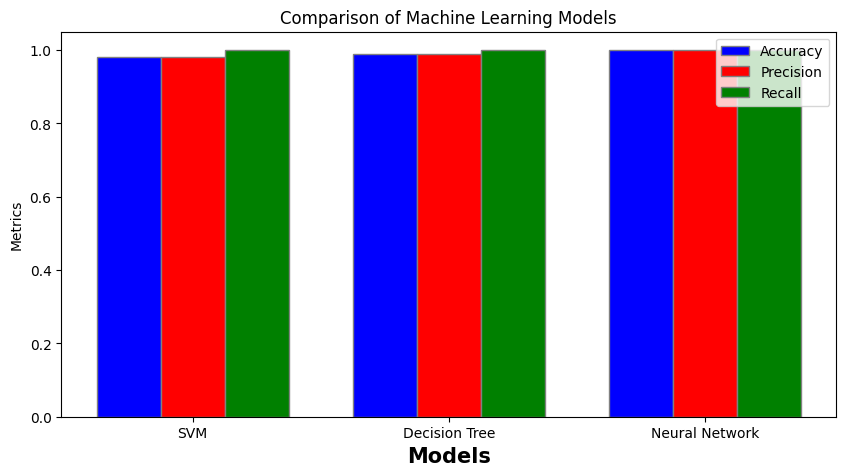

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the models
models = ['SVM', 'Decision Tree', 'Neural Network']

# Metrics to compare
accuracy = [0.98, 0.99, 1.0]
precision = [0.98, 0.99, 1.0]
recall = [1.00, 1.0, 1.0]
f1_scores = [0.99, 0.99, 1.0]

# Creating index for each tick in bar plot
bar_width = 0.25
r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar plot
plt.figure(figsize=(10, 5))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='r', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')

# Adding labels
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(accuracy))], models)
plt.ylabel('Metrics')
plt.title('Comparison of Machine Learning Models')

# Create legend & Show graphic
plt.legend()
plt.show()

# CONCLUSIONS AND RECOMMENDATIONS

Through the comprehensive exploration and analysis of machine learning algorithms for breast cancer prediction, this project has provided valuable insights into the classification of tumors as malignant (M) or benign (B). The findings from the comparative analysis offer pertinent guidance for selecting the most suitable algorithms tailored to the dataset and problem type.

## Summary of Finding
The project evaluated multiple machine learning algorithms, including Decision Trees, Support Vector Machines (SVMs), and potentially Neural Networks, to classify breast cancer based on various features extracted from medical data.
Each algorithm exhibited distinct performance characteristics in terms of accuracy, precision, recall, and computational complexity.
The dataset's features and the inherent complexity of breast cancer classification influenced the algorithms' effectiveness and suitability.

## Recommendations
For the given dataset and problem type, Decision Trees emerge as promising choices due to their ability to handle non-linear relationships and feature interactions effectively. Their interpretability and ease of implementation make them particularly suitable for practical deployment.
Support Vector Machines (SVMs) could also be considered, especially if the dataset exhibits high-dimensional feature spaces or requires strong generalization capabilities. However, careful consideration of computational resources and parameter optimization is necessary.
Neural Networks may offer potential benefits in capturing intricate patterns and relationships within the data. However, their implementation requires significant computational resources and expertise in hyperparameter tuning and model optimization. They may be warranted for scenarios demanding complex pattern recognition or aiming for state-of-the-art accuracy.

Based on the superior performance observed in this project, it is recommended to deploy Neural Networks for breast cancer prediction, especially if aiming for optimal accuracy and handling intricate data patterns.
Despite the computational resources and expertise required for hyperparameter tuning and model optimization, the benefits of utilizing Neural Networks outweigh these challenges, particularly in scenarios where achieving state-of-the-art accuracy is paramount

## Implications for Practice
Healthcare professionals and data scientists can leverage Neural Networks as a powerful tool for enhancing breast cancer diagnosis and treatment planning, thus improving patient outcomes and quality of care.
Continued research and development in Neural Network architectures and optimization techniques can further enhance their effectiveness in medical diagnosis, leading to advancements in early detection and personalized treatment strategies for breast cancer patients.